# Part A: Clustering

## K-Means Clustering

In [2]:
#install.packages("factoextra")
install.packages('corrplot')
install.packages('rpart.plot')
install.packages("adabag")
install.packages("dplyr")
install.packages("caret")
install.packages('e1071', dependencies=TRUE)
install.packages("caretEnsemble")
install.packages('C50', dependencies = T)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
also installing the dependency ‘caret’

Warning message in install.packages("adabag"):
“installation of package ‘caret’ had non-zero exit status”Warning message in install.packages("adabag"):
“installation of package ‘adabag’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [26]:
library(ggplot2)
library(tidyr)
#library(factoextra)
library(corrplot)
library(cluster) 
library(rpart)
library(rpart.plot)
library(adabag)
library(dplyr)
library(caret)
library(mlbench)
library(caretEnsemble)


Loading required package: caret
Loading required package: lattice
Loading required package: foreach
Loading required package: doParallel
Loading required package: iterators
Loading required package: parallel

Attaching package: ‘dplyr’

The following object is masked from ‘package:ggplot2’:

    vars

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘caretEnsemble’

The following object is masked from ‘package:ggplot2’:

    autoplot



In [27]:
df <- read.csv("/home/khadija/Downloads/asg3/framingham.csv")
head(df)

male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,39,4,0,0,0,0,0,0,195,106.0,70,26.97,80,77,0
0,46,2,0,0,0,0,0,0,250,121.0,81,28.73,95,76,0
1,48,1,1,20,0,0,0,0,245,127.5,80,25.34,75,70,0
0,61,3,1,30,0,0,1,0,225,150.0,95,28.58,65,103,1
0,46,3,1,23,0,0,0,0,285,130.0,84,23.10,85,85,0
0,43,2,0,0,0,0,1,0,228,180.0,110,30.30,77,99,0


In [28]:
# drop rows of nans
df=na.omit(df) 
any(is.na(df))

[1] FALSE

In [29]:
str(df)

'data.frame':	3658 obs. of  16 variables:
 $ male           : int  1 0 1 0 0 0 0 0 1 1 ...
 $ age            : int  39 46 48 61 46 43 63 45 52 43 ...
 $ education      : int  4 2 1 3 3 2 1 2 1 1 ...
 $ currentSmoker  : int  0 0 1 1 1 0 0 1 0 1 ...
 $ cigsPerDay     : int  0 0 20 30 23 0 0 20 0 30 ...
 $ BPMeds         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ prevalentStroke: int  0 0 0 0 0 0 0 0 0 0 ...
 $ prevalentHyp   : int  0 0 0 1 0 1 0 0 1 1 ...
 $ diabetes       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ totChol        : int  195 250 245 225 285 228 205 313 260 225 ...
 $ sysBP          : num  106 121 128 150 130 ...
 $ diaBP          : num  70 81 80 95 84 110 71 71 89 107 ...
 $ BMI            : num  27 28.7 25.3 28.6 23.1 ...
 $ heartRate      : int  80 95 75 65 85 77 60 79 76 93 ...
 $ glucose        : int  77 76 70 103 85 99 85 78 79 88 ...
 $ TenYearCHD     : int  0 0 0 1 0 0 1 0 0 0 ...
 - attr(*, "na.action")= 'omit' Named int  15 22 27 34 37 43 50 55 71 73 ...
  ..- attr(*, "names")= ch

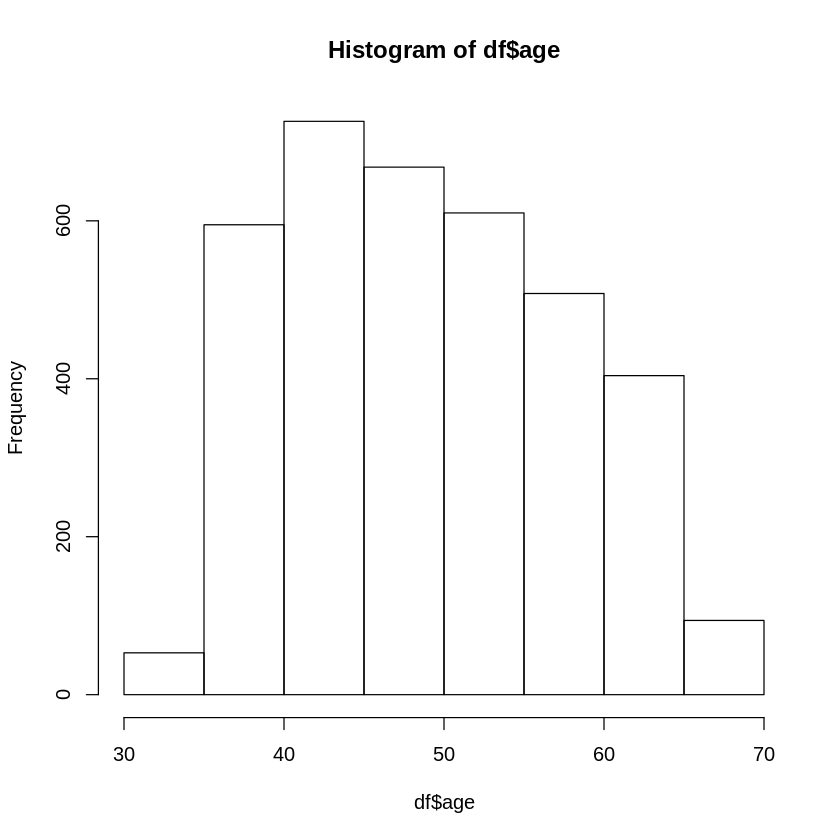

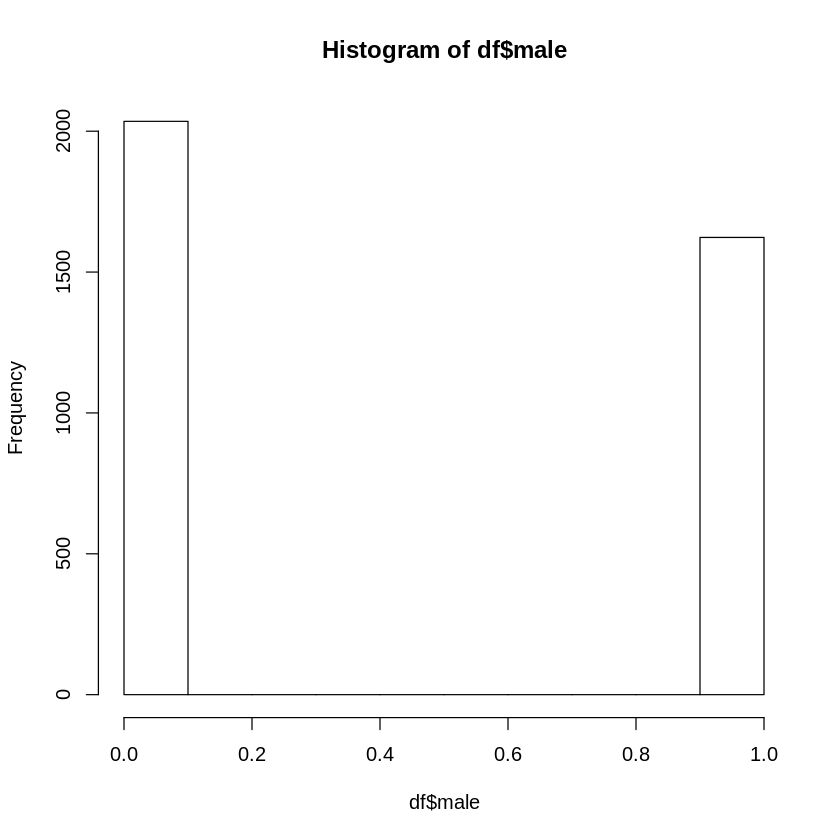

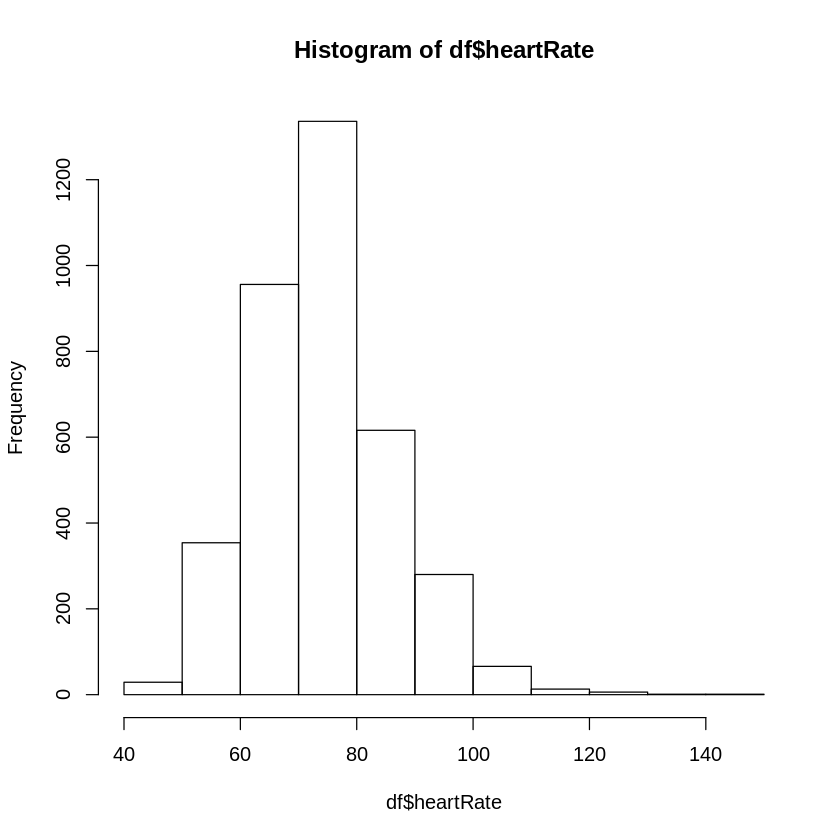

In [30]:
hist(df$age)
hist(df$male)
hist(df$heartRate)


In [31]:
# scale age
df$age=scale(df$age)

In [32]:
# Perform k‐means clustering on the selected attributes, specifying k = 4 clusters and plot.
df_subset<-df[,1:2]
Cluster_kmean <- kmeans(df_subset, 4, nstart = 30)

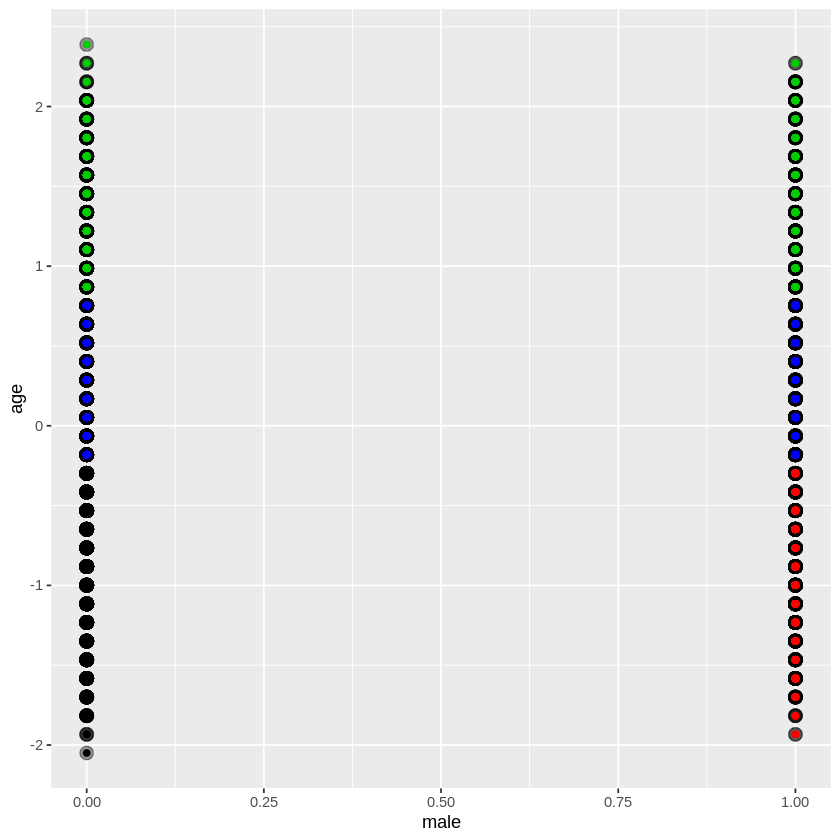

In [33]:
#Tabulate the cross distribution
#table(Cluster_kmean$cluster,df$age)

Cluster_kmean$cluster <- factor(Cluster_kmean$cluster)

ggplot(df_subset, aes(male, age)) + 
  geom_point(alpha = 0.4, size = 3.5) + geom_point(col = Cluster_kmean$cluster) + 
  scale_color_manual(values = c('black', 'red', 'green','cyan'))

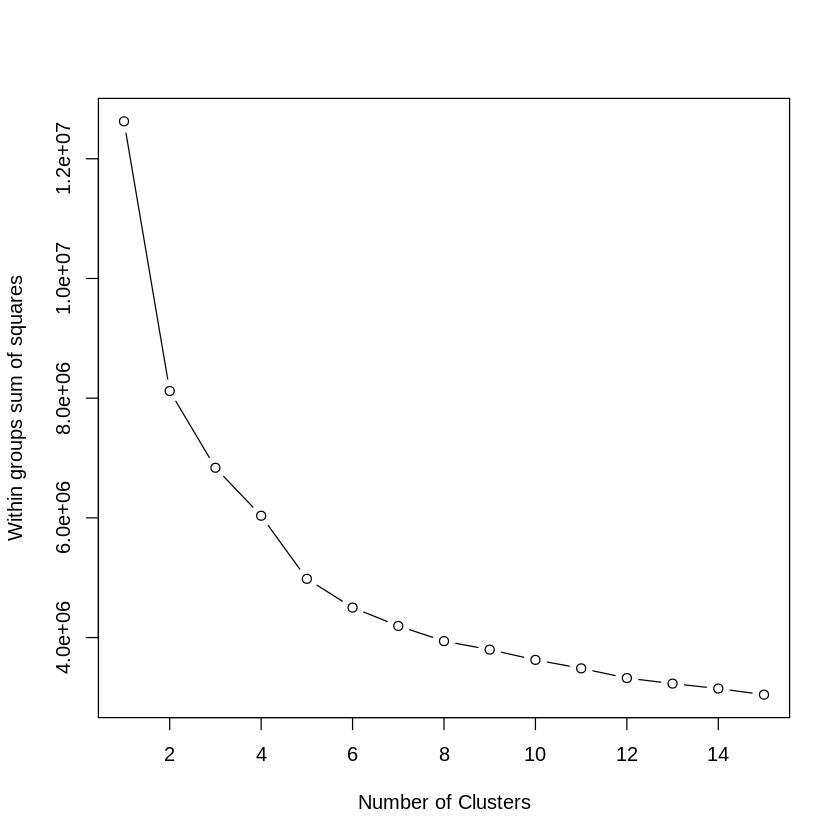

In [34]:
# Apply the elbow method to determine the best k and plot.
# Elbow Curve

wss <- (nrow(df)-1)*sum(apply(df,2,var))
for (i in 2:15) {
  wss[i] <- sum(kmeans(df,centers=i)$withinss)
}
plot(1:15, wss, type="b", xlab="Number of Clusters",ylab="Within groups sum of squares")


In [35]:
# Evaluate the quality of the clusters using the Silhouette Coefficient method.
silhouette_score <- function(k){
  km <- kmeans(df, centers = k, nstart=25)
  ss <- silhouette(km$cluster, dist(df))
  mean(ss[, 3])}
k <- 2:10
k


[1]  2  3  4  5  6  7  8  9 10

In [36]:
plot(k, type='b', avg_sil, xlab='Number of clusters', ylab='Average Silhouette Scores', frame=FALSE)


ERROR: Error in xy.coords(x, y, xlabel, ylabel, log): object 'avg_sil' not found


In [115]:

avg_sil <- sapply(k, silhouette_score)
avg_sil

Warning message:
“did not converge in 10 iterations”

[1] 0.3280800 0.2469285 0.2553310 0.2502439 0.2097557 0.2005726 0.1824135
[8] 0.1802226 0.1790073

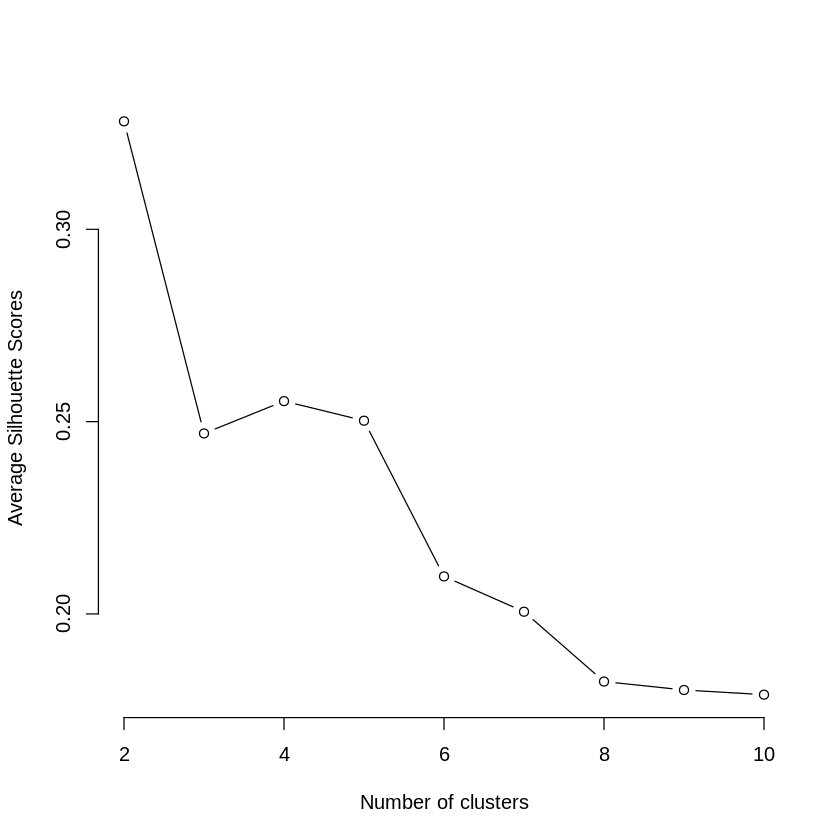

In [116]:
plot(k, type='b', avg_sil, xlab='Number of clusters', ylab='Average Silhouette Scores', frame=FALSE)

## Hierarchical Clustering

In [38]:
# Use hierarchical agglomerative clustering with single linkage to cluster the data. 
data<-c(10, 20 ,40 ,80 ,85 ,121 ,160, 168 ,195)

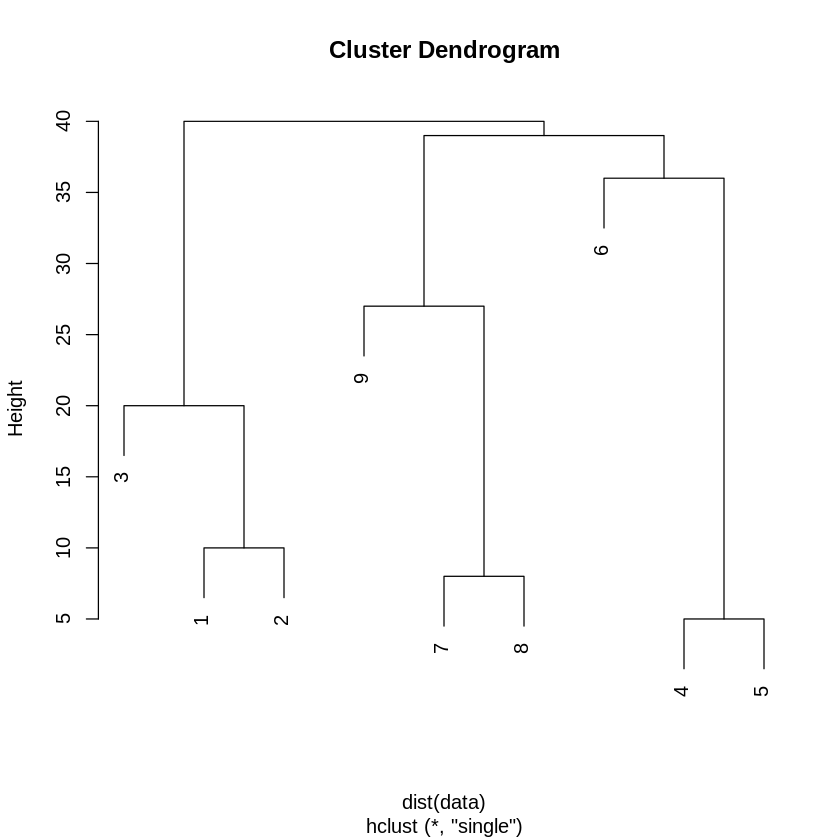

In [39]:
# Draw a dendrogram to illustrate your clustering and include a vertical axis with numerical labels
# indicating the height of each parental node in the dendrogram.
clusters <- hclust(dist(data),method="single")

#Plot the dendrogram
plot(clusters)

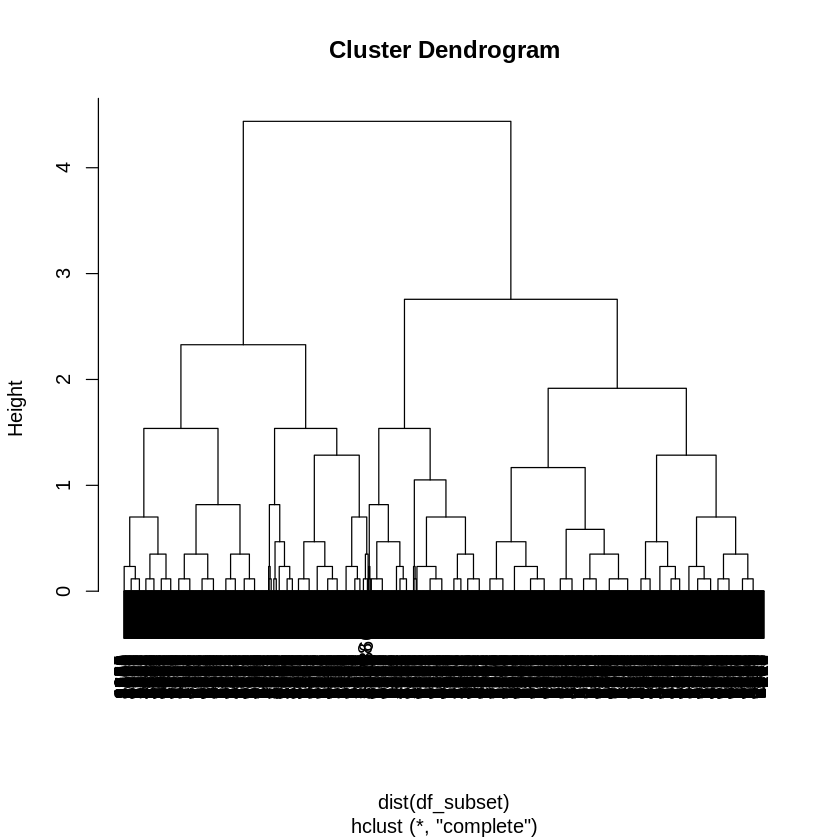

In [40]:
# Perform clustering on the selected attributes, specifying k = 4 clusters and plot.using hierarchical agglomerative clustering with complete linkage.
clusters <- hclust(dist(df_subset),method = "complete")

#Plot the dendrogram
plot(clusters)

In [41]:
clusterCut_4 <- cutree(clusters, 4)
#table the clustering distribution with actual networth
table(clusterCut_4,df_subset$male)  
table(clusterCut_4,df_subset$age)

            
clusterCut_4   0   1
           1 256 436
           2 863 705
           3 402 170
           4 514 312

            
clusterCut_4 -2.04997436711799 -1.93317962784663 -1.81638488857528
           1                 1                 5                14
           2                 0                 0                 0
           3                 0                 0                 0
           4                 0                 0                 0
            
clusterCut_4 -1.69959014930392 -1.58279541003256 -1.4660006707612
           1                33                77               80
           2                 0                 0                0
           3                 0                 0                0
           4                 0                 0                0
            
clusterCut_4 -1.34920593148984 -1.23241119221848 -1.11561645294712
           1               124               147                75
           2                 0                 0                92
           3                 0                 0                 0
           4                

# Part B: Model Evaluation & Performance Improvement

In [42]:
# read churn data set
churn <- read.csv("/home/khadija/Downloads/asg3/customer_churn.csv")

In [43]:
head(churn)

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes


In [44]:
str(churn)

'data.frame':	7043 obs. of  21 variables:
 $ customerID      : Factor w/ 7043 levels "0002-ORFBO","0003-MKNFE",..: 5376 3963 2565 5536 6512 6552 1003 4771 5605 4535 ...
 $ gender          : Factor w/ 2 levels "Female","Male": 1 2 2 2 1 1 2 1 1 2 ...
 $ SeniorCitizen   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Partner         : Factor w/ 2 levels "No","Yes": 2 1 1 1 1 1 1 1 2 1 ...
 $ Dependents      : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 2 1 1 2 ...
 $ tenure          : int  1 34 2 45 2 8 22 10 28 62 ...
 $ PhoneService    : Factor w/ 2 levels "No","Yes": 1 2 2 1 2 2 2 1 2 2 ...
 $ MultipleLines   : Factor w/ 3 levels "No","No phone service",..: 2 1 1 2 1 3 3 2 3 1 ...
 $ InternetService : Factor w/ 3 levels "DSL","Fiber optic",..: 1 1 1 1 2 2 2 1 2 1 ...
 $ OnlineSecurity  : Factor w/ 3 levels "No","No internet service",..: 1 3 3 3 1 1 1 3 1 3 ...
 $ OnlineBackup    : Factor w/ 3 levels "No","No internet service",..: 3 1 3 1 1 1 3 1 1 3 ...
 $ DeviceProtection: Factor w/ 3 levels "No","

In [45]:
churn=na.omit(churn) 
any(is.na(churn))

[1] FALSE

In [46]:
dim(churn)

[1] 7032   21

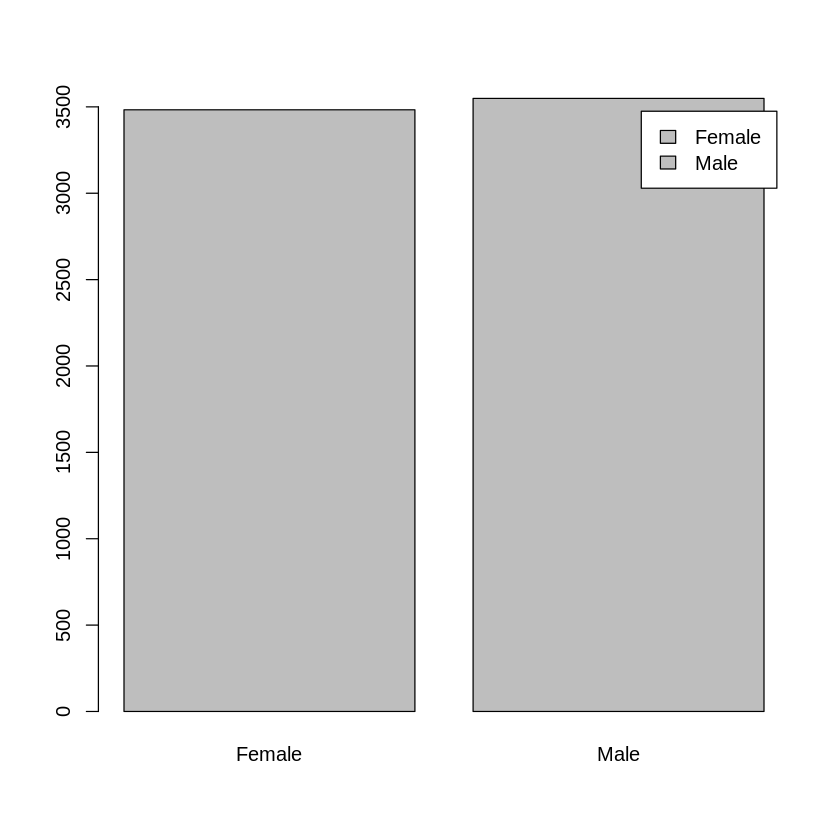

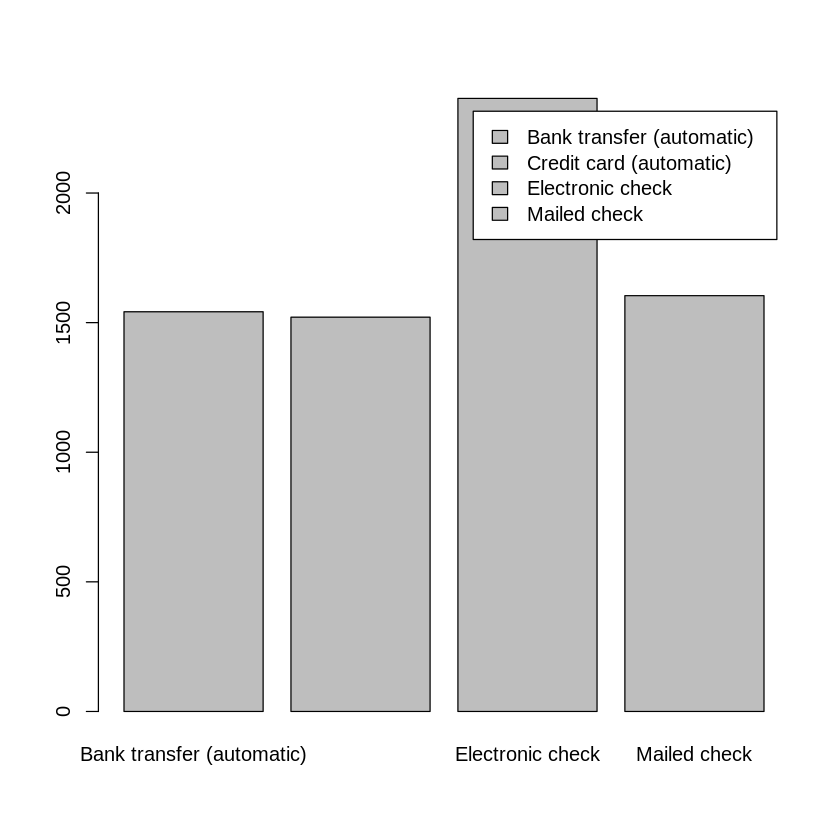

In [47]:
cc<-table(churn$gender)
barplot(cc, legend = TRUE)
cc<-table(churn$PaymentMethod)
barplot(cc, legend = TRUE)

a) Partition the data set using the holdout method, so that 67% of the records are included in
the training data set and 33% are included in the test data set. Use a bar graph to confirm
your proportions.

In [84]:
# Partition the data set 
#https://stackoverflow.com/questions/17200114/how-to-split-data-into-training-testing-sets-using-sample-function

train_size <- floor(0.67 * nrow(churn))
set.seed(123)
train_ind <- sample(seq_len(nrow(churn)), size = train_size)
train <- churn[train_ind, ]
test <- churn[-train_ind, ]


In [85]:
dim(train)[1]/dim(churn)[1]

[1] 0.6699374

In [86]:
dim(test)[1]/dim(churn)[1]

[1] 0.3300626

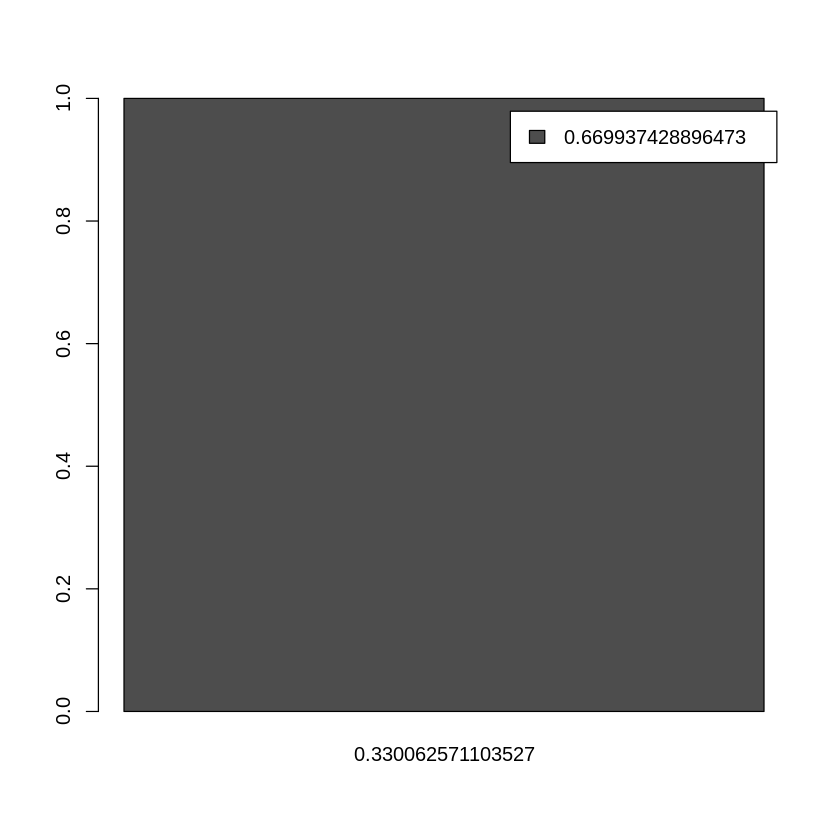

In [87]:
cc<-table(dim(train)[1]/dim(churn)[1],dim(test)[1]/dim(churn)[1])
barplot(cc, legend = TRUE)

b) Identify the total number of records in the training data set and how many records in the
training data set have a churn value of true (or 1). Calculate how many true churn records
you need to resample in order to have 30% of the rebalanced data set have true churn
values.

In [88]:
dim(train)
yes <- subset(train, Churn == "Yes")
dim(yes)[1]
dim(yes)[1]/dim(train)[1]


[1] 4711   21

[1] 1250

[1] 0.2653364

In [89]:
0.3*dim(train)[1]

[1] 1413.3

c) Perform the rebalancing described in (b) and confirm that 30% of the records in the
rebalanced data set have true churn values.

In [90]:
train<-subset(train, Churn != "Yes")

In [91]:
train

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2468,6559-RAKOZ,Male,0,Yes,Yes,49,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,One year,Yes,Electronic check,97.95,4917.90,No
2516,8869-LIHMK,Female,0,No,No,64,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),115.10,7334.05,No
527,8606-CIQUL,Male,1,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),115.75,8399.15,No
4298,2192-OZITF,Female,0,No,No,45,Yes,Yes,DSL,Yes,...,No,Yes,No,Yes,Two year,No,Mailed check,73.55,3349.10,No
1847,7369-TRPFD,Male,0,No,No,19,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,18.80,279.20,No
1146,3522-CDKHF,Female,0,Yes,No,32,Yes,No,Fiber optic,Yes,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.50,2324.70,No
3377,9629-NHXFW,Female,0,Yes,Yes,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.40,19.40,No
5358,1460-UZPRJ,Male,0,Yes,No,60,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.95,1258.15,No
5373,2786-GCDPI,Female,1,No,No,50,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.95,5222.35,No
5142,0303-WMMRN,Male,0,No,No,5,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.25,86.05,No


In [92]:
dim(train)

[1] 3461   21

In [98]:
thirty  <- yes[sample(1:nrow(yes), 1414,
   replace=TRUE),] 
thirty_data<- data.frame(thirty)

In [99]:
dim(thirty_data)

[1] 1414   21

In [100]:
thirty_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2288,5440-FLBQG,Male,1,Yes,No,69,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),108.40,7318.20,Yes
2054,6173-ITPWD,Male,0,Yes,No,47,Yes,Yes,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Bank transfer (automatic),83.35,4065.00,Yes
3252,9710-ZUSHQ,Female,1,No,No,37,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),106.75,4056.75,Yes
5091,6502-HCJTI,Male,1,Yes,No,7,Yes,Yes,Fiber optic,Yes,...,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic),94.70,673.10,Yes
5195,1902-XBTFB,Male,0,No,Yes,22,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,89.40,2001.50,Yes
5598,6284-AHOOQ,Male,1,No,No,22,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Bank transfer (automatic),90.50,1910.60,Yes
1377,3164-AALRN,Male,0,No,No,5,Yes,No,DSL,No,...,Yes,No,Yes,Yes,One year,Yes,Mailed check,70.00,347.40,Yes
5440,5959-BELXA,Male,1,No,No,32,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),96.15,3019.25,Yes
3008,6022-UGGSO,Female,1,No,No,32,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.40,2276.95,Yes
5967,8019-ENHXU,Male,0,Yes,No,42,Yes,Yes,Fiber optic,No,...,Yes,Yes,No,Yes,Month-to-month,Yes,Electronic check,99.45,4138.05,Yes


In [101]:
train_data<-rbind(train,thirty_data)

In [103]:
tail(train_data)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3077,4250-FDVOU,Female,0,No,No,6,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,No,Electronic check,56.25,389.1,Yes
403.1,0979-PHULV,Male,0,Yes,Yes,69,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),99.45,7007.6,Yes
5804.2,4143-OOBWZ,Male,0,Yes,No,5,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,81.30,416.3,Yes
3365,5519-YLDGW,Female,0,Yes,No,21,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.90,2254.2,Yes
2517.4,8245-UMPYT,Female,1,No,No,16,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,96.40,1581.2,Yes
6414.1,7739-LAXOG,Female,0,Yes,Yes,32,Yes,Yes,Fiber optic,No,...,Yes,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),91.05,2954.5,Yes


In [104]:
dim(train_data)

[1] 4875   21

d) Create a decision tree model that can predict Churn using the data set given. Use
predictors you think are appropriate and obtain the predicted value.

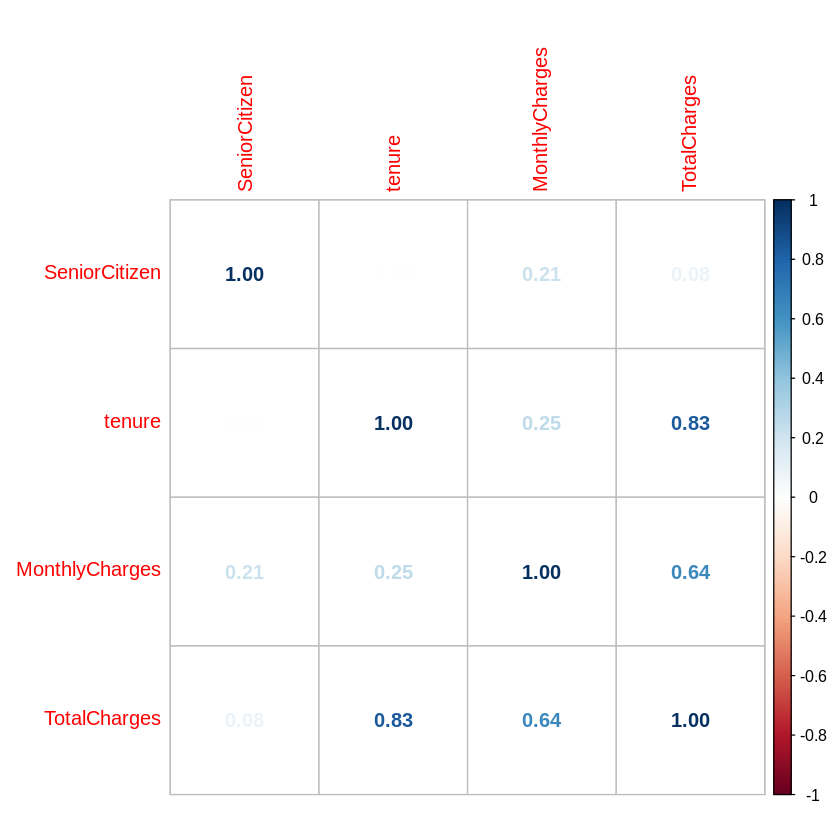

In [105]:
# get numrtical columns to plot correlation matrix
#https://stackoverflow.com/questions/5863097/selecting-only-numeric-columns-from-a-data-frame
nums <- unlist(lapply(train_data, is.numeric))  
corrmatrix <- cor(train_data[ , nums])
corrplot(corrmatrix, method = 'number')

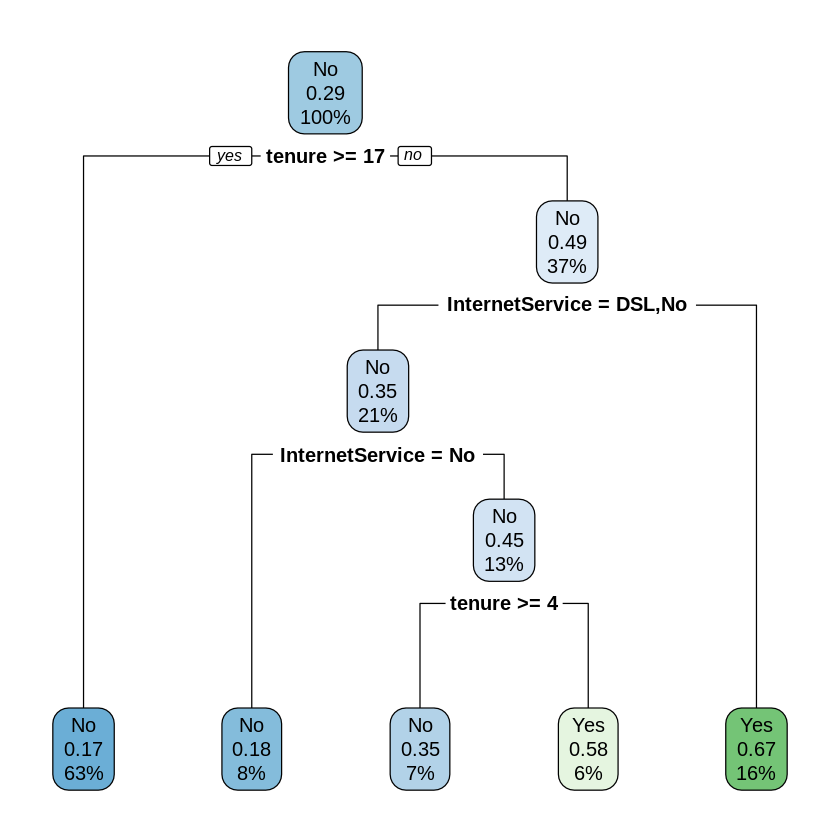

In [107]:
model <- rpart(train_data$Churn~ .,
               data = train_data[, c('gender','SeniorCitizen','Partner','Dependents','tenure','PhoneService','MultipleLines','InternetService','Churn')], method = "class")

#plot the model
rpart.plot(model)

e) Use an ensemble method (e.g., Random Forest, Adaboost) to obtain the predicted value
of Churn. Tune the hyper-parameters (e.g., node size, max depth, max terminal nodes,

In [110]:
# single tree
tr <- rpart(Churn ~ ., data = train_data)
pred <- predict(tr, test, type = "class")
confusionMatrix(pred, test$Churn)

Confusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  1563  421
       Yes  139  198
                                         
               Accuracy : 0.7587         
                 95% CI : (0.7408, 0.776)
    No Information Rate : 0.7333         
    P-Value [Acc > NIR] : 0.002794       
                                         
                  Kappa : 0.2786         
                                         
 Mcnemar's Test P-Value : < 2.2e-16      
                                         
            Sensitivity : 0.9183         
            Specificity : 0.3199         
         Pos Pred Value : 0.7878         
         Neg Pred Value : 0.5875         
             Prevalence : 0.7333         
         Detection Rate : 0.6734         
   Detection Prevalence : 0.8548         
      Balanced Accuracy : 0.6191         
                                         
       'Positive' Class : No             
                                         

In [111]:
# bagging
bag <- bagging(Churn ~ ., data = train_data)
pred1 <- predict(bag, test, type = "class")


In [113]:
# lab code
confusionMatrix(class, PersonalLoan)

ERROR: Error: `data` and `reference` should be factors with the same levels.


In [114]:

# boosting
boost <- boosting(Churn ~ ., data = train_data)
pred12<- predict(boost, test, type = "class")


In [ ]:
# lab code
confusionMatrix(class, Churn)

In [16]:

#confusionMatrix(class, Churn)

f) Using a confusion matrix, compare the evaluation measures from the ensemble method
with the decision tree model based on the following criteria: Accuracy, Sensitivity and
Specificity. Identify the model that performed best and worst according to each criterion.

In [17]:
#confusionMatrix(table( pred1, test$Churn)) 

In [20]:
#confusionMatrix(
 # factor(pred1, levels = 1:148),
  #as.factor(test$Churn, levels = 1:148)
#)


In [21]:
#confusionMatrix(pred1,as.factor(test$Churn))

In [22]:
#confusionMatrix(class, Churn)

In [24]:
#confusionMatrix(class, train$Churn)


g) Carry out a ROC analysis to compare the performance of the ensemble method with the
decision tree technique. Plot the ROC graph of the models.

In [ ]:
## Creating a simple tuned model ----
# automated parameter tuning of C5.0 decision tree 
RNGversion("3.5.2") # use an older random number generator to match the book
set.seed(300)
m <- train(Churn ~ ., data = train_data, method = "C5.0")

# summary of tuning results
m

Warning message in RNGkind("Mersenne-Twister", "Inversion", "Rounding"):
“non-uniform 'Rounding' sampler used”

In [ ]:

# apply the best C5.0 candidate model to make predictions
p <- predict(m, train_data)
table(p, train_data$Churn)


In [ ]:
# obtain predicted classes
head(predict(m, train_data, type = "raw"))

In [ ]:

# obtain predicted probabilities
head(predict(m, train_data, type = "prob"))


In [ ]:
## Customizing the tuning process ----
# use trainControl() to alter resampling strategy
ctrl <- trainControl(method = "cv", number = 10,
                     selectionFunction = "oneSE")

# use expand.grid() to create grid of tuning parameters
grid <- expand.grid(model = "tree",
                    trials = c(1, 5, 10, 15, 20, 25, 30, 35),
                    winnow = FALSE)

# look at the result of expand.grid()
grid

In [ ]:
# customize train() with the control list and grid of parameters 
RNGversion("3.5.2") # use an older random number generator to match the book
set.seed(300)
m <- train(default ~ ., data = train_data, method = "C5.0",
           metric = "Kappa",
           trControl = ctrl,
           tuneGrid = grid)
m


In [ ]:

## Random Forests ----
# random forest with default settings
library(randomForest)
RNGversion("3.5.2") # use an older random number generator to match the book
set.seed(300)
rf <- randomForest(default ~ ., data = train_data)
rf


In [ ]:

ctrl <- trainControl(method = "repeatedcv",
                     number = 10, repeats = 10,
                     selectionFunction = "best",
                     savePredictions = TRUE,
                     classProbs = TRUE,
                     summaryFunction = twoClassSummary)

# auto-tune a random forest
grid_rf <- expand.grid(mtry = c(2, 4, 8, 16))

In [ ]:

# test a random forest with the above settings
# note: this may take a long time to run (~10 minutes)
RNGversion("3.5.2") # use an older random number generator to match the book
set.seed(300)
m_rf <- train(default ~ ., data = train_data, method = "rf",
              metric = "ROC", trControl = ctrl,
              tuneGrid = grid_rf)
m_rf


In [ ]:
# auto-tune a boosted C5.0 decision tree
grid_c50 <- expand.grid(model = "tree",
                        trials = c(10, 25, 50, 100),
                        winnow = FALSE)

RNGversion("3.5.2") # use an older random number generator to match the book
set.seed(300)
m_c50 <- train(default ~ ., data = train_data, method = "C5.0",
               metric = "ROC", trControl = ctrl,
               tuneGrid = grid_c50)
m_c50

In [ ]:
# compare their ROC curves
library(pROC)
roc_rf <- roc(m_rf$pred$obs, m_rf$pred$yes)
roc_c50 <- roc(m_c50$pred$obs, m_c50$pred$yes)

plot(roc_rf, col = "red", legacy.axes = TRUE)
plot(roc_c50, col = "blue", add = TRUE)